# Proyecto 3 con Moving Average

1) Importación de librerías necesarias:

In [1]:
import pandas as pd
import csv
import requests
import ast
import matplotlib
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math

2) Abrir el dataset

In [9]:
df = pd.read_csv('data.csv')

In [10]:
df1 = df.dropna()
df1

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [12]:
df1 = df1.drop(df1.columns[[1,2,3,5,6,7]], axis='columns')
df1 = df1.rename(columns={'0':'price', '4':'time'})
df1.head(3)

,Timestamp,Close
0,1325317920,4.39
478,1325346600,4.39
547,1325350740,4.57


4) Convetir fecha

In [14]:
from datetime import datetime
listaDate = []
for date in df1['Timestamp']:
    listaDate.append(datetime.fromtimestamp(date))
df1.index = listaDate

5) Convertir antes al formato datetime para que lo reconozca como índice timestamp

In [17]:
df1.index.name="time"

In [19]:
df2 = df1.drop(df1.columns[[0]], axis='columns')
df2

,Close
time,
2011-12-31 08:52:00,4.39
2011-12-31 16:50:00,4.39
2011-12-31 17:59:00,4.57
2011-12-31 18:00:00,4.58
2012-01-01 05:16:00,4.58
...,...
2021-03-31 01:56:00,58686.00
2021-03-31 01:57:00,58685.81
2021-03-31 01:58:00,58723.84


In [20]:
df3= df2[::960]

In [64]:
#Guardo los datos en un nuevo archivo:
df3.to_csv('reducido_2.csv', header=True, index=False)

In [72]:
#Filtro y guardo los datos en el archivo de entrenamiento hasta la fecha de febrero 2021
df4 = (df3[df3.index < "2021-03-01"])
df4.to_csv('reducido_train.csv', header=True, index=False) 
df4

,Close,MA_365,logPrice
time,,,
2011-12-31 08:52:00,4.39,NaN,0.642465
2012-02-23 10:48:00,4.76,NaN,0.677607
2012-04-12 17:48:00,4.85,NaN,0.685742
2012-05-15 21:54:00,4.95,NaN,0.694605
2012-06-12 21:21:00,5.66,NaN,0.752816
...,...,...,...
2021-02-26 01:59:00,46839.00,19630.069753,4.670608
2021-02-26 17:59:00,48129.89,19736.883096,4.682415
2021-02-27 10:02:00,46538.85,19839.053836,4.667816


In [ ]:
#Filtro y guardo los datos en el archivo de prueba del último mes (marzo 2021):
df5 = (df3[df3.index > "2021-02-28"]) 
df5.to_csv('reducido_test.csv', header=True, index=False)

6) Graficamos

<function matplotlib.pyplot.show(close=None, block=None)>

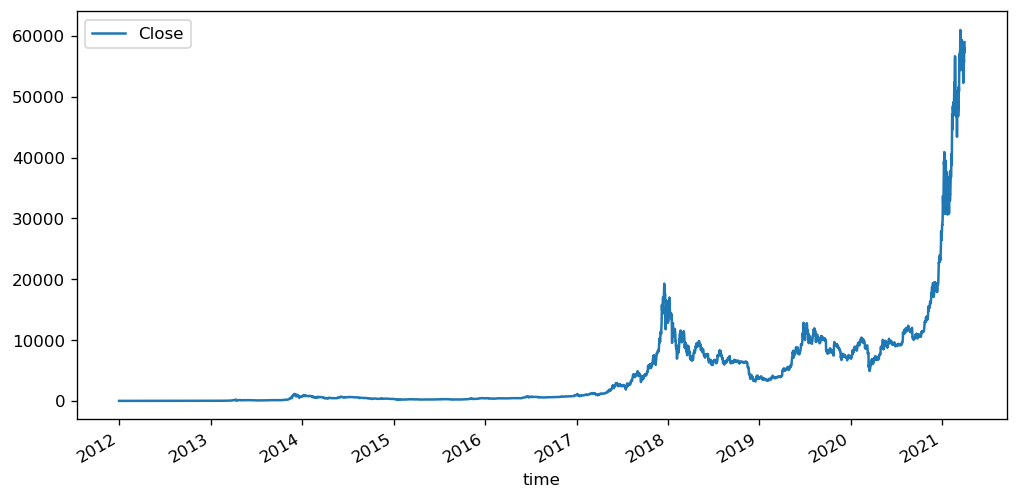

In [24]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
df3.plot(kind='line', y='Close')
plt.show

7) Seleccionar modelo

In [25]:
from statsmodels.tsa.arima_model import ARIMA
# Crear el modelo ARIMA
model = ARIMA(df3['Close'], order=(2, 1, 2)) #hiperparámetros
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

In [26]:
# Realizar la predicción
predictions = model_fit.forecast(steps=30)[0]

# Imprimir las predicciones
print(predictions)

[58532.83457804 58504.15791566 58982.69982943 58597.06079812
 58548.26233469 59013.50387343 58660.09132727 58593.2952385
 59044.57609876 58721.96588371 58639.1760013  59075.95529443
 58782.72537183 58685.82787431 59107.67538643 58842.41160129
 58733.17795014 59139.76574369 58901.06702831 58781.15711447
 59172.25147503 58958.73451793 58829.6999862  59205.15371662
 59015.45712666 58878.74484747 59238.48990951 59071.27790418
 58928.23356477 59272.27406716]


8) Calcular el Moving Average

In [27]:
#Con una ventana de 365 días
df3['MA_365'] = df3['Close'].rolling(window=365).mean()


<ipython-input-27-c8519715d6fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['MA_365'] = df3['Close'].rolling(window=365).mean()


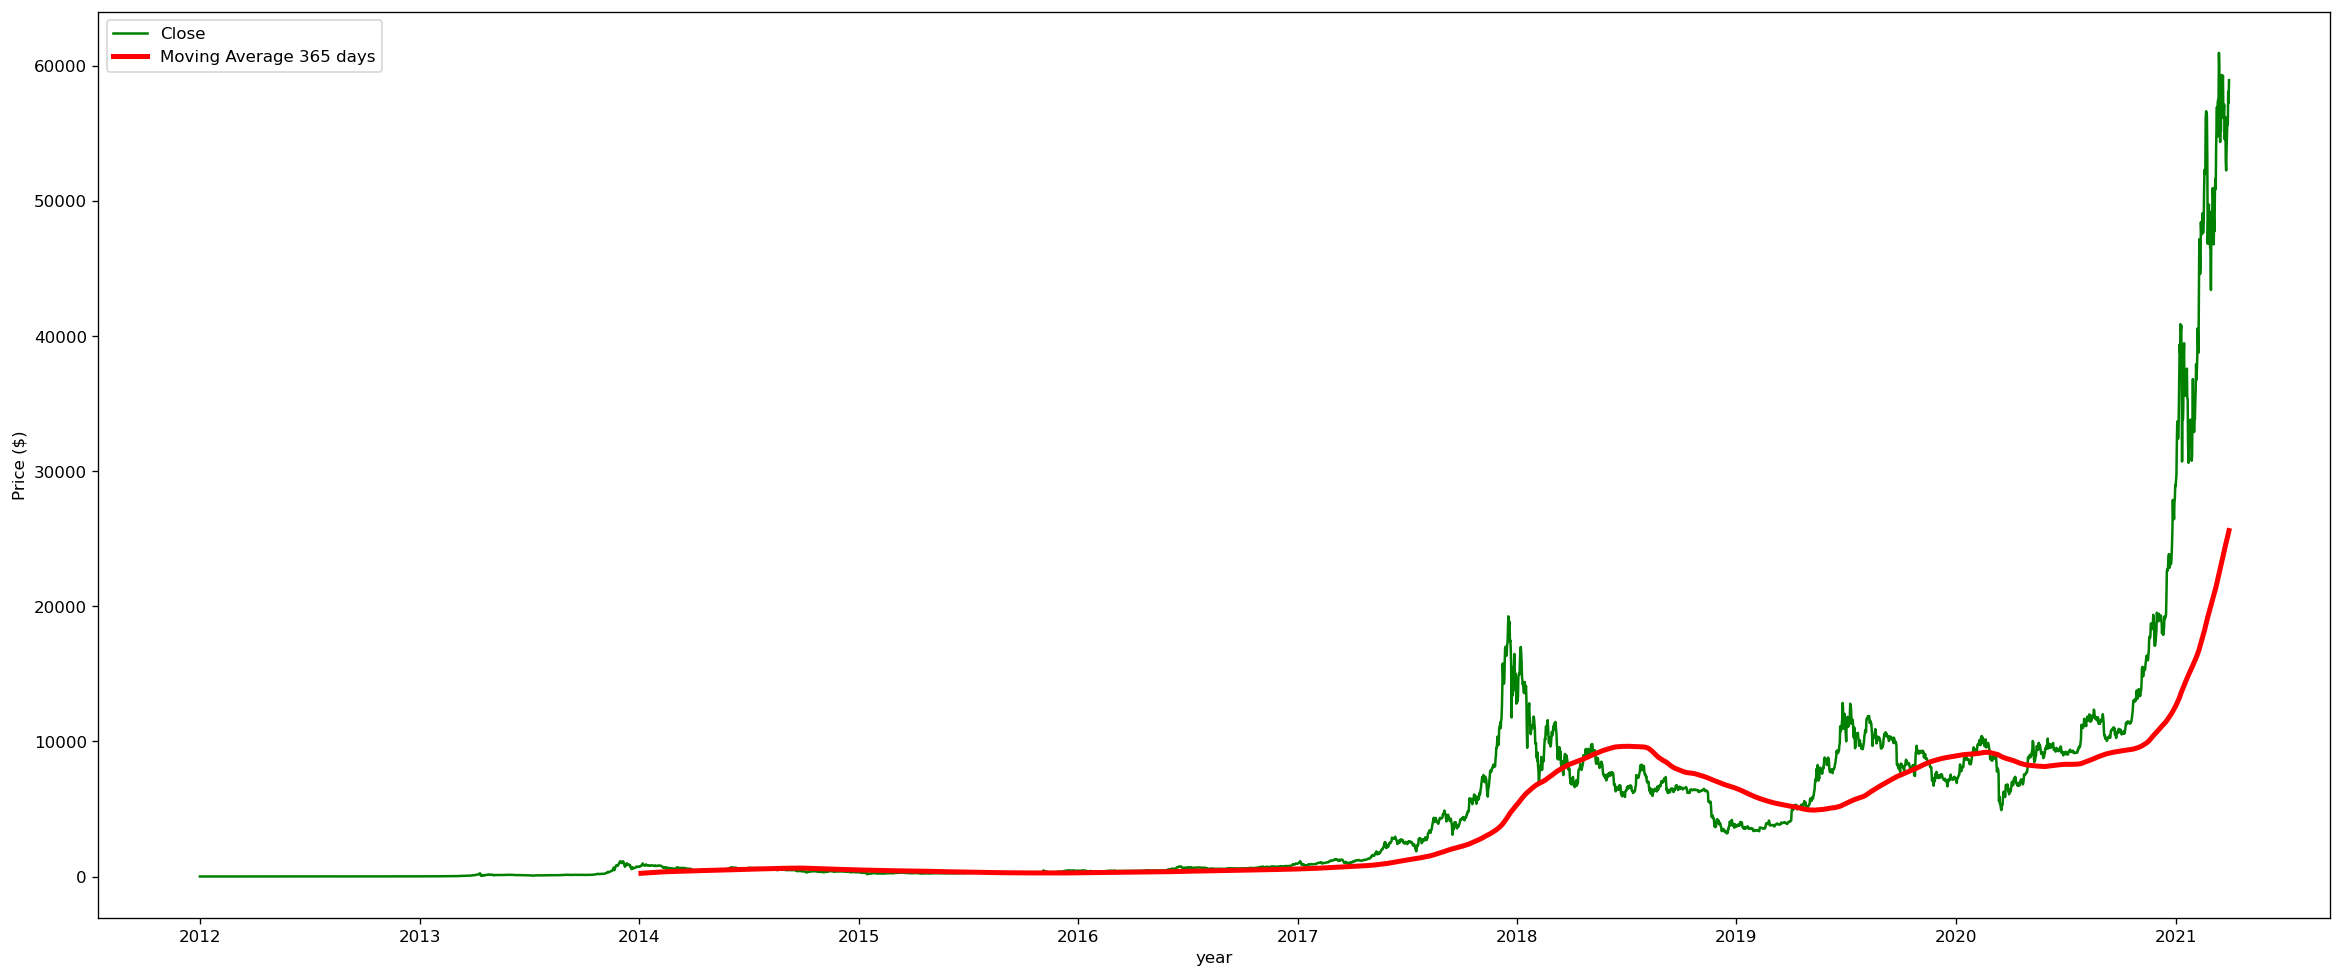

In [28]:
plt.rcParams.update({'figure.figsize': (10, 5), 'figure.dpi': 120})
# Draw it
plt.figure(figsize=(24,10))
plt.plot(df3['Close'], label = 'Close', color = 'green')
plt.plot(df3['MA_365'], label = 'Moving Average 365 days', color = 'red', linewidth=3)
plt.xlabel('year')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

9) Calcular y graficar la escala Logarítmica

In [29]:
df3["logPrice"] = df3["Close"].apply(lambda x: math.log10(x))
df3

<ipython-input-29-688ca7e1cd59>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["logPrice"] = df3["Close"].apply(lambda x: math.log10(x))


,Close,MA_365,logPrice
time,,,
2011-12-31 08:52:00,4.39,NaN,0.642465
2012-02-23 10:48:00,4.76,NaN,0.677607
2012-04-12 17:48:00,4.85,NaN,0.685742
2012-05-15 21:54:00,4.95,NaN,0.694605
2012-06-12 21:21:00,5.66,NaN,0.752816
...,...,...,...
2021-03-28 04:15:00,56033.03,25098.440521,4.748444
2021-03-28 20:22:00,55667.20,25223.734877,4.745599
2021-03-29 12:27:00,58087.46,25355.045205,4.764082


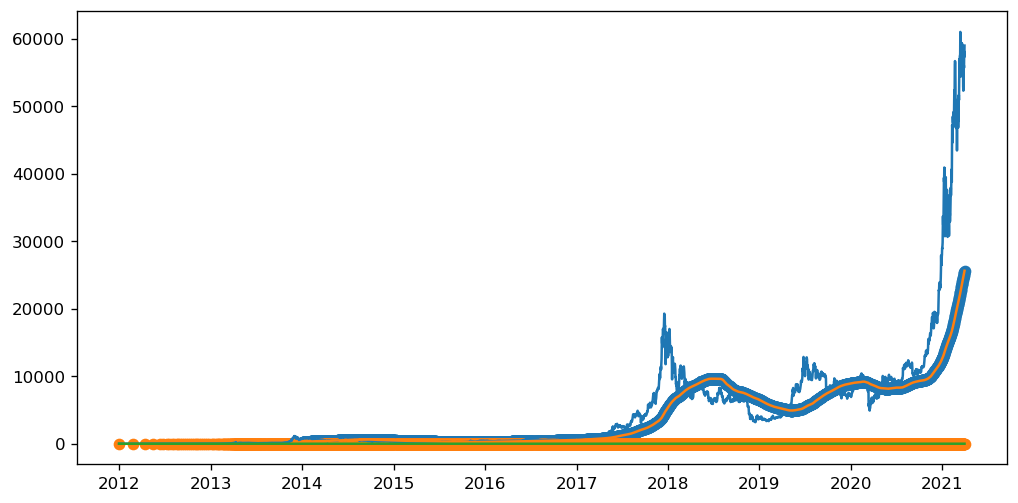

In [30]:
fig, ax = plt.subplots()
ax.scatter(df3.index, df3.MA_365)
ax.scatter(df3.index, df3.logPrice)
ax.plot(df3)
plt.show()

In [31]:
# dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
train = df3[:int(0.8*(len(df3)))]
test = df3[int(0.8*(len(df3))):]

In [32]:
# entrenar el modelo ARIMA
model = ARIMA(train['Close'], order=(1, 0, 1))
model_fit = model.fit()

c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\Users\n_sar\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

10) Entrenamiento del modelo

In [61]:
# hacer predicciones en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))[0] + 2000

In [62]:
# calcular el error de las predicciones
error = np.mean(np.abs(predictions - test['Close'].values)) / np.mean(test['Close'].values)
print('Error:', error)

Error: 0.5778490408635373


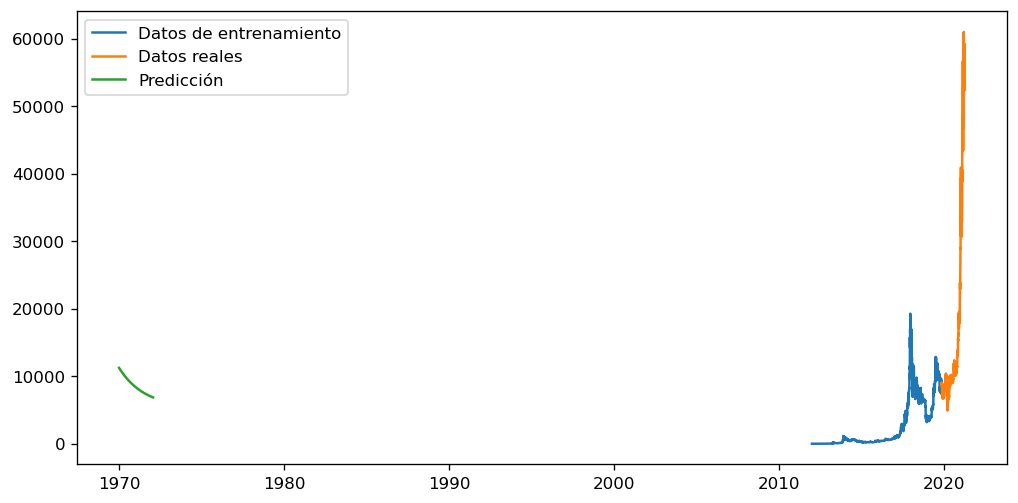

In [63]:
# visualizar los resultados
plt.plot(train['Close'], label='Datos de entrenamiento')
plt.plot(test['Close'], label='Datos reales')
plt.plot(predictions, label='Predicción')
plt.legend()
plt.show()